# Given the following graph, implement the algorithms in Python:
---
$\textbf{1. Kruskal's Algorithm}$

$\textbf{2. Prim's Algorithm}$

$\textbf{3. Djitraka's Shortest Path Algorithm}$

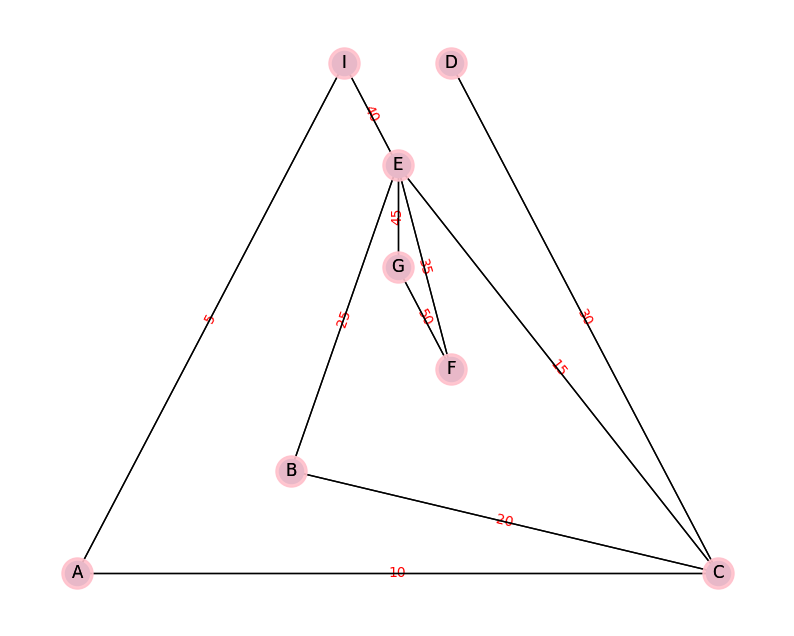

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

# Kruskal's Algorithm:
---

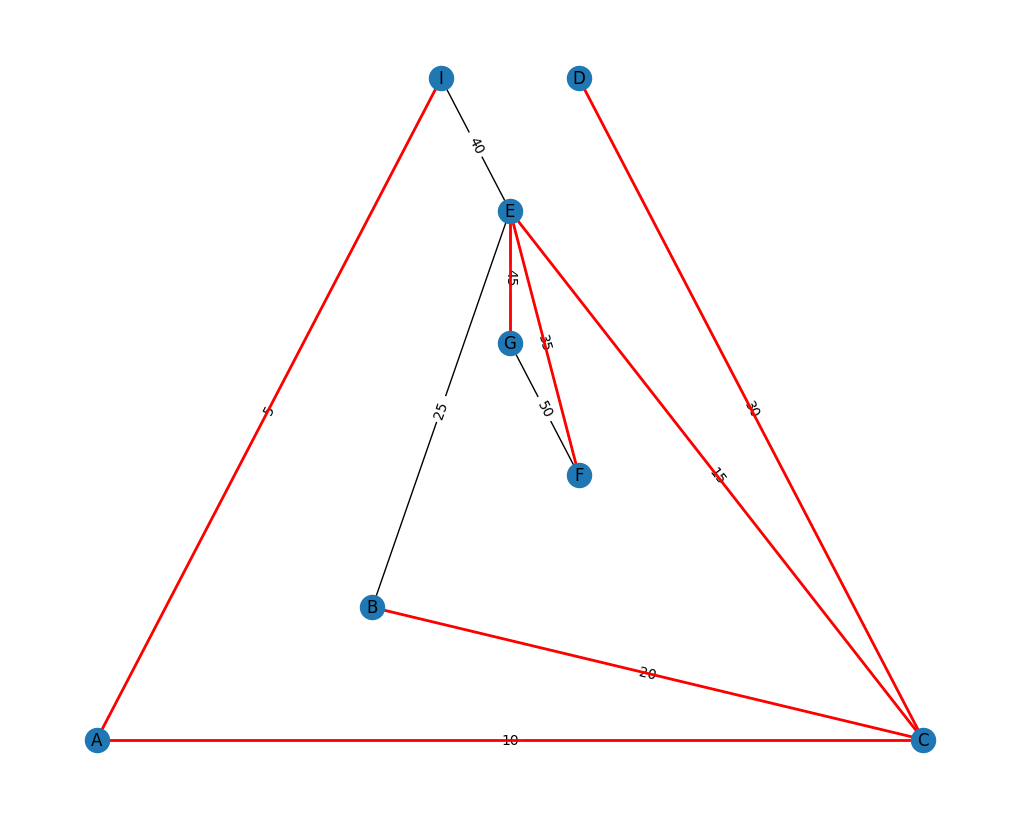

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Implement Kruskal's algorithm
def kruskal(graph):
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    for edge in edges:
        u, v, w = edge
        mst.add_edge(u, v, weight=w['weight'])
        if len(nx.cycle_basis(mst)) > 0:
            mst.remove_edge(u, v)
    return mst

# Find the minimum spanning tree
mst = kruskal(G)

# Draw the original graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Draw the minimum spanning tree
nx.draw_networkx_edges(mst, pos=pos, edge_color='red', width=2)

plt.show()


# Prim's Algorithm:
---

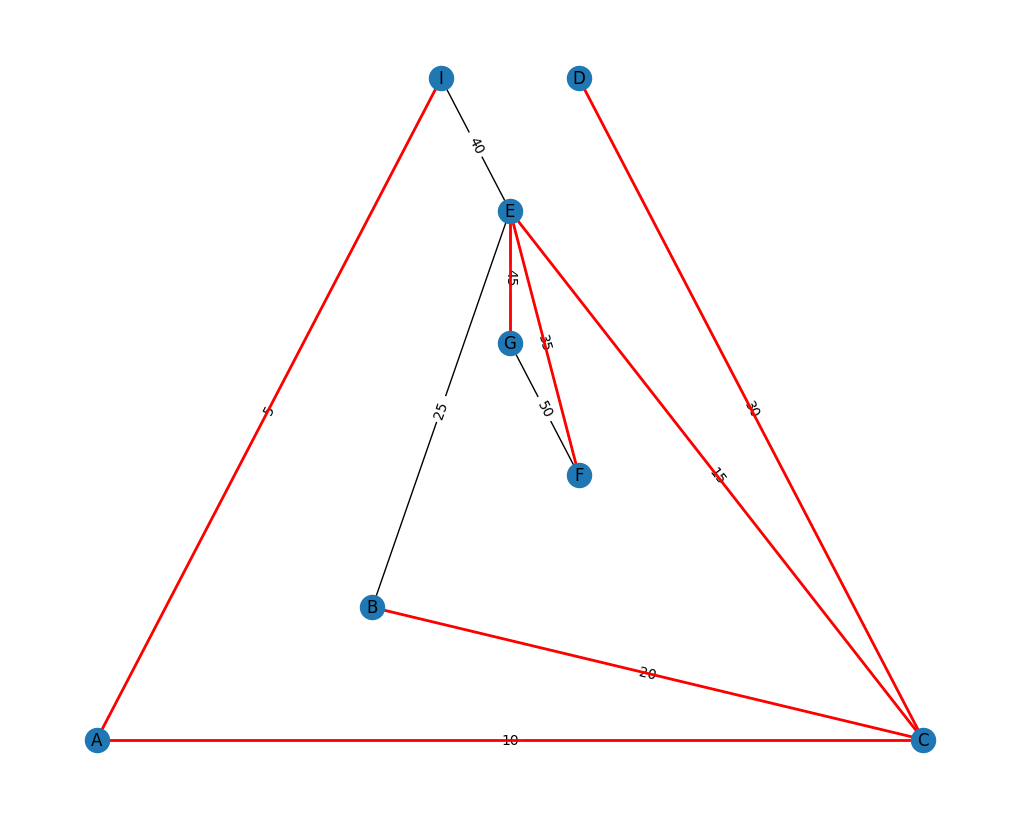

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Implement Prim's algorithm
def prim(graph):
    mst = nx.Graph()
    start_node = list(graph.nodes())[0]  # Start from an arbitrary node
    mst.add_node(start_node)
    while len(mst.nodes()) < len(graph.nodes()):
        min_edge = None
        min_weight = float('inf')
        for u in mst.nodes():
            for v, weight in graph[u].items():
                if v not in mst.nodes() and weight['weight'] < min_weight:
                    min_edge = (u, v)
                    min_weight = weight['weight']
        if min_edge:
            u, v = min_edge
            mst.add_node(v)
            mst.add_edge(u, v, weight=min_weight)
    return mst

# Find the minimum spanning tree
mst = prim(G)

# Draw the original graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Draw the minimum spanning tree
nx.draw_networkx_edges(mst, pos=pos, edge_color='red', width=2)

plt.show()

# Djitraka's Shortest Path Algorithm:
---

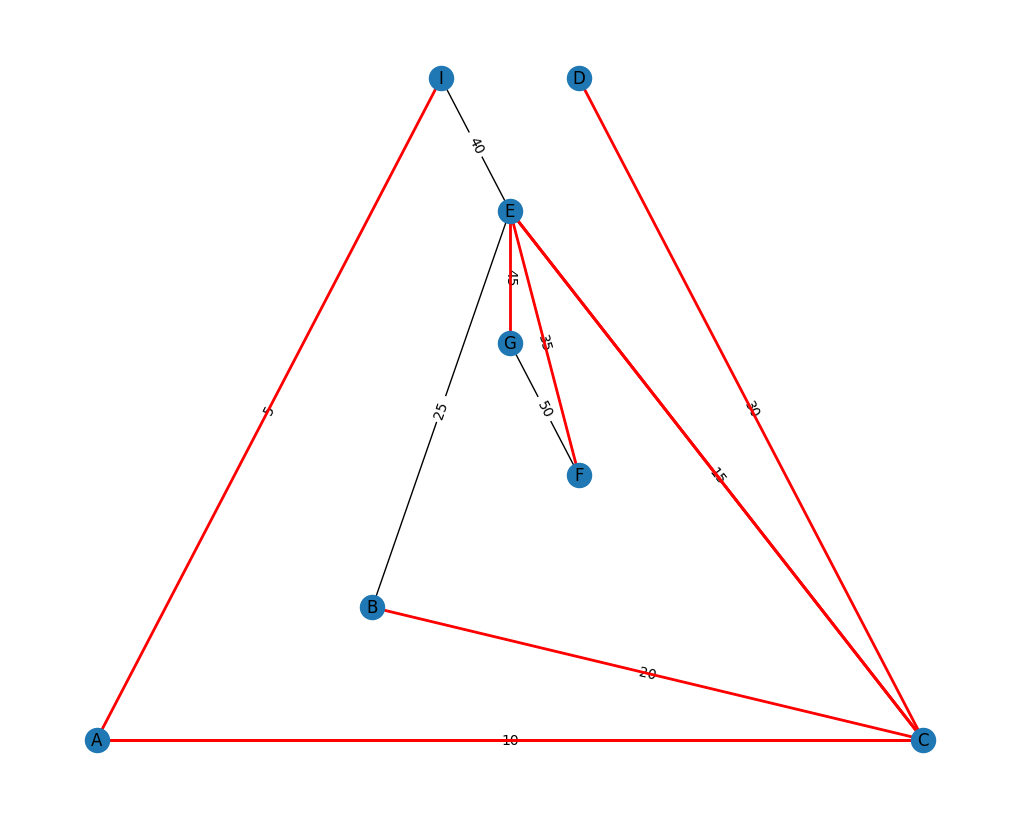

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Implement Dijkstra's algorithm to find the shortest path to every other vertex
def dijkstra(graph, source):
    shortest_paths = {}
    for target in graph.nodes():
        if target != source:
            shortest_path = nx.shortest_path(graph, source=source, target=target, weight='weight')
            shortest_paths[target] = shortest_path
    return shortest_paths

# Find the shortest paths from node "A" to every other node
all_shortest_paths = dijkstra(G, "A")

# Draw the original graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Highlight the shortest paths in red
for target, shortest_path in all_shortest_paths.items():
    edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=2)

plt.show()
